In [20]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('ice_cream_sales.csv')

La correlación no tiene sentido 

In [22]:
df.corr()['sales']['price']

0.07554365164568472

Crea X y Y 

In [23]:
target = 'sales'

X = df.drop(target, axis=1)
X['price'] = X.price.round()
y = df[target]


Crea el modelo 

In [24]:
model = xgb.XGBRegressor(max_depth=3, n_estimators=100)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

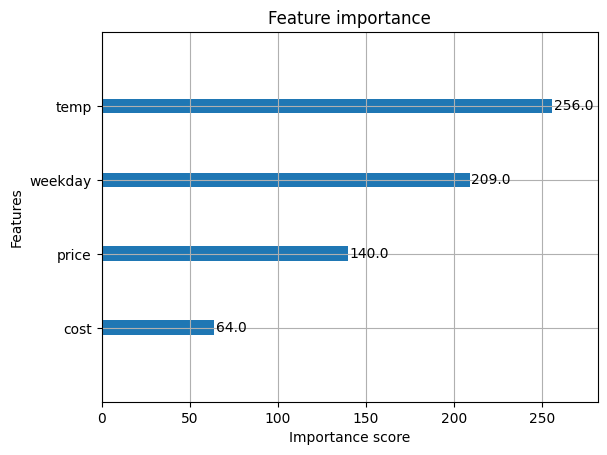

In [25]:
# Plot feature importance
xgb.plot_importance(model)

Distribución del precio

<Axes: >

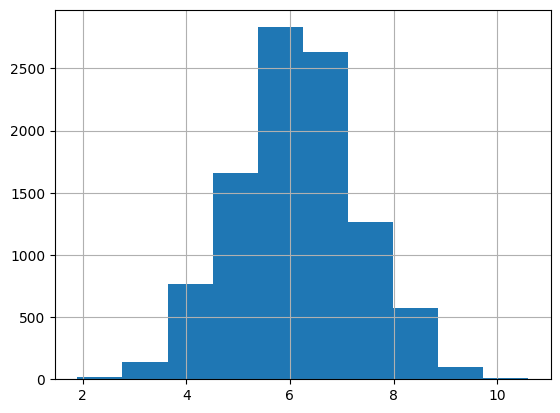

In [26]:
df.price.hist()

In [27]:
X['price'].value_counts()

price
6.0     3514
7.0     2262
5.0     1956
8.0     1106
4.0      835
9.0      212
3.0       84
10.0      20
2.0        9
11.0       2
Name: count, dtype: int64

In [28]:
precios = [4, 5, 6, 7, 8, 9]

In [29]:
ejemplo = X.loc[[200]]

In [30]:
ventas = []
for i in precios:
    ejemplo_copia = ejemplo.copy()
    ejemplo_copia['price'] = i
    ventas.append(model.predict(ejemplo_copia)[0])

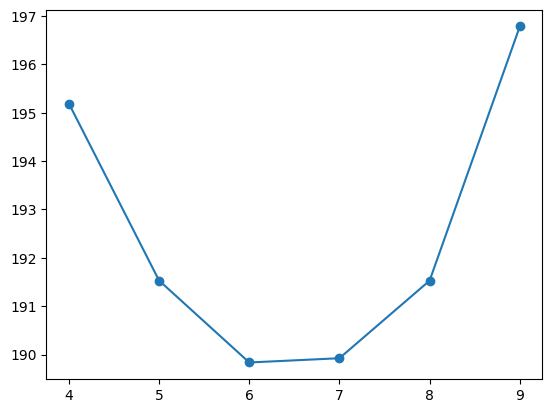

In [31]:
plt.plot(precios, ventas, marker="o")

In [32]:
df.price.round()

0       6.0
1       5.0
2       8.0
3       5.0
4       7.0
       ... 
9995    6.0
9996    5.0
9997    5.0
9998    8.0
9999    6.0
Name: price, Length: 10000, dtype: float64

## Crear un S Learner

In [49]:
precios = [4, 5, 6, 7, 8]

In [51]:
ejemplo = X.iloc[[1000]]
ejemplo

,temp,weekday,cost,price
1000,22.0,2,0.5,6.0


In [52]:
simulaciones = []
for i in precios:
    counterfactual = ejemplo.copy()
    counterfactual['price'] = i
    simulaciones.append(model.predict(counterfactual)[0])
    

Text(0, 0.5, 'Ventas')

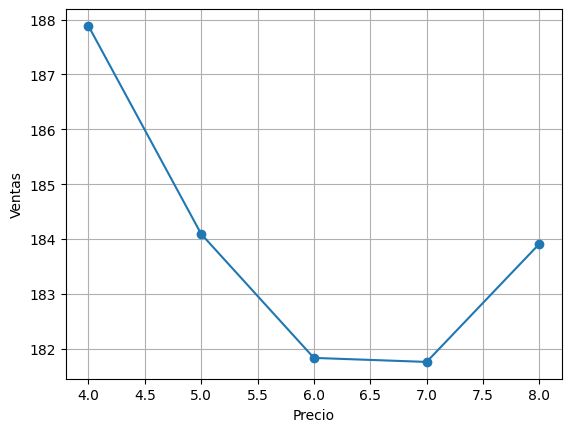

In [53]:
plt.plot(precios, simulaciones, marker="o")
plt.grid()
plt.xlabel('Precio')
plt.ylabel('Ventas')

In [54]:
X['price'].value_counts()

price
6.0     3514
7.0     2262
5.0     1956
8.0     1106
4.0      835
9.0      212
3.0       84
10.0      20
2.0        9
11.0       2
Name: count, dtype: int64